<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/Nostradamus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Кризисы, астрономические события, предсказания**

**Цель:** собрать данные для проверки гипотезы о взаимосвязи глобальных мировых кризисов, астрономических событий и пророчеств. 
<p><b>Временной интервал:</b> с 01.01.1915 по 22.10.2020</p>

In [ ]:
# Переменные начала и конца периода
from datetime import datetime, timedelta
import pandas as pd
startime = datetime(1915, 1, 1, 0, 0, 0)
endtime = datetime(2020, 10, 22, 23, 59, 59)

## **1. Данные об астрономических событиях**

### 1.1. Лунные затмения
Лу́нное затме́ние — затмение, которое наступает, когда Луна входит в конус тени от Земли.
<p><b>Задачи</b></pi>

- в коде ниже ([источник](https://gist.github.com/priyadi/e5322666248ee22a81d8e56e84fe1bcb)) разобраться с часовым поясом
- еще раз проверить, что это полные затмения
- как точка для развития - добавить больше типов затмений

In [ ]:
def moon_eclipse(startime,endtime):
    """
       Формирует набор данных с датами лунного затмения (полные).
       Работает, повторяя каждый час и вычисляя,
       расстояние между Луной и Солнцем и определяя составляет оно более 180 ° -0,9 ° (= 179,1 °).
       Число 0,9 ° жестко запрограммировано для простоты, для большей точности оно
       следует рассчитывать по расстоянию от Луны до Солнца.

       Входные данные:
       _ _ _ _ _ _
       startime (datetime) - дата и время начала периода
       endtime  (datetime) - дата и время конца периода
       
       Результат:
       _ _ _ _ _ _
       final_set (dataframe) - набор данных с датами лунных затмений и меткой 'лунное затмение'
    """


    import ephem
    import numpy as np
    from datetime import datetime, timedelta
    startime = datetime(1914, 1, 1, 0, 0, 0)
    moon_eclipse_list = []  
    # Инициализируем экземпляров/объектов: Луна, Солнце & observer
    moon = ephem.Moon()
    sun = ephem.Sun()
    observer = ephem.Observer()
    observer.elevation = -6371000  # помещаем observer в центр Земли
    observer.pressure = 0          # отключение атмосферной рефракции ????Чтоэтовообщетакоезачто
    
    # цикл кажый час
    while startime <= endtime:
        observer.date = startime
    
        # вычислиние положения Солнца и Луны относительно наблюдателя
        moon.compute(observer)
        sun.compute(observer)
    
        # separation() - функция вычисляет угол в градусах между двумя телами 
        # вычисление расстояния между Луной Солнцем, преобразование в 
        # от радиан к градусам, и уменишение на 180°.
        # это в основе своей the separation of the moon from the Earth's
        # center of umbra.
        sep = abs((float(ephem.separation(moon, sun))
        / 0.01745329252) - 180)
    
        # затмение происходит,если sep составляет меньше, чем 0.9°.
        # такой подход должен обнаружить все полные и частичные затмения, но может ошибаться на 
        # полутеневых лунных затмениях.
        # величина sep жестко установлена. Для большей точности это должно вычисляться, как расстояние от Солнца до Луны
        if sep < 0.9:
            moon_eclipse_list.append(startime.strftime('%Y/%m/%d %H:%M:%S'))
            # затмение не может случиться более, чем 1н раз в день,
            # сделаем шаг в 24 часа
            startime += timedelta(days = 1)
        else:
            # сделаем шаг в 24 часа, даже если затмение не найдено
            startime += timedelta(hours = 1)
    final_set = pd.DataFrame (moon_eclipse_list,columns=['date'])
    final_set['date'] = pd.to_datetime(final_set['date'])
    final_set['date'] = final_set['date'].dt.date
    final_set['event'] = 'moon_eclipse'
    return final_set
    
moon_eclipse_set = moon_eclipse(startime,endtime)
print('\033[1mТипы данных:\033[0m \n',moon_eclipse_set.dtypes)
print('\033[1mРазмер получившегося датасета:\033[0m',moon_eclipse_set.shape)
moon_eclipse_set['date']=moon_eclipse_set['date'].map(lambda x: x.strftime('%Y-%m'))
moon_eclipse_set = moon_eclipse_set.groupby('date').count().reset_index()
moon_eclipse_set.rename(columns={'event':'full_moon_eclipse'},inplace=True)
print('\033[1mМесяцы с кол-м затмений больше 2, check\033[0m',moon_eclipse_set[moon_eclipse_set['full_moon_eclipse']>1])
moon_eclipse_set.tail()

Типы данных: 
 date     object
event    object
dtype: object
Размер получившегося датасета: (136, 2)
Месяцы с кол-м затмений больше 2, check Empty DataFrame
Columns: [date, full_moon_eclipse]
Index: []


,date,full_moon_eclipse
131,2017-08,1
132,2018-01,1
133,2018-07,1
134,2019-01,1
135,2019-07,1


In [ ]:
moon_eclipse_set

,date,full_moon_eclipse
0,1914-03,1
1,1914-09,1
2,1916-01,1
3,1916-07,1
4,1917-01,1
...,...,...
131,2017-08,1
132,2018-01,1
133,2018-07,1
134,2019-01,1


In [ ]:
moon_eclipse_set.to_csv(r'moon_eclipse_set'+str(datetime.datetime.now())+'csv')

### 1.2. Даты новолуний и полнолуний
[Идея для формирования](https://stackoverflow.com/questions/2526815/moon-lunar-phase-algorithm).

In [ ]:
def get_moons_in_year(year):
    """
    Формирует список дат полнолуний и новолуний за указанный год. 
    Входные данные:
    _ _ _ _ _ _
    year - int, год за который необходимо сформировать даты новолуний и полнолуний

    Результат:
    _ _ _ _ _ _
    список(list), содержащий кортежи(tuple) в фромате (DATE,'full') или (DATE,'new')
    """

    import ephem
    import datetime
    moons=[]

    date=ephem.Date(datetime.date(year,1,1))
    while date.datetime().year==year:
        date=ephem.next_full_moon(date)
        moons.append( (date.datetime(),'full') )

    date=ephem.Date(datetime.date(year,1,1))
    while date.datetime().year==year:
        date=ephem.next_new_moon(date)
        moons.append( (date.datetime(),'new') )

    moons.sort(key=lambda x: x[0])

    return moons

def full_new_moons_table(period):
    import pandas as pd
    import datetime

    result_frame = pd.DataFrame()
    year = datetime.datetime.today().year
    YEARS = [year - i for i in range(period)]

    for i in YEARS:
        result_frame = result_frame.append(pd.DataFrame(get_moons_in_year(i), columns=['date', 'full|new']))
    result_frame = result_frame.reset_index()
    result_frame.drop('index',axis = 1,inplace=True)
    result_frame['date'] = result_frame['date'].dt.date
    return result_frame

full_new_moons_set = full_new_moons_table(201)
full_new_moons_set['date']=full_new_moons_set['date'].map(lambda x: x.strftime('%Y-%m'))
full_new_moons_set = pd.get_dummies(full_new_moons_set, columns=['full|new'])
full_new_moons_set.rename(columns={'full|new_full':'full_moon','full|new_new':'new_moon'},inplace=True)
full_new_moons_set = full_new_moons_set.groupby('date').count()
full_new_moons_set = full_new_moons_set.reset_index()
full_new_moons_set.tail()
#Время по гринвичу. utc+0.

,date,full_moon,new_moon
2408,2020-09,2,2
2409,2020-10,3,3
2410,2020-11,2,2
2411,2020-12,2,2
2412,2021-01,2,2


In [ ]:
full_new_moons_set.to_csv(r'full_new_moons_set'+str(datetime.datetime.now())+'csv')

### 1.3. Ретроградный меркурий 
Соскрапить данные с [сайта](https://ru.astro-seek.com/retrogradnye-planety-astro-kalendar-1925)

In [ ]:
# Извлечение данных о ретроградности меркурия
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import requests
import time
import re

planets = ['Меркурий', 'Венера', 'Марс', 'Юпитер', 'Сатурн', 'Уран', 'Нептун', 'Плутон', 'Узел', 'Лилит', 'Хирон']
months = ['Янв', 'Фев','Мар','Апр','Мая','Июня','Июля','Авг','Сен','Окт','Ноя','Дек']
months_dict = {'Янв':'1', 'Фев':'2','Мар':'3','Апр':'4','Мая':'5','Июня':'6','Июля':'7','Авг':'8','Сен':'9','Окт':'10','Ноя':'11','Дек':'12'}
planets_dict = {'Меркурий':'Mercury', 'Венера':'Venus', 'Марс':'Mars', 'Юпитер':'Jupiter', 'Сатурн':'Saturn', 'Уран':'Uranium', 'Нептун':'Neptune', 'Плутон':'Pluto', 'Узел':'Knot', 'Лилит':'Lilith', 'Хирон':'Chiron'}
start_position = 'Ретро'
end_position = 'Прямое'

df = pd.DataFrame(pd.period_range(start='1/1/1800', end='1/1/2099', freq='M'), columns=['Date'])
col=['Mercury','Venus','Mars','Jupiter','Saturn','Uranium','Neptune','Pluto','Knot','Lilith','Chiron']
for k,v in enumerate(col):
  df.insert(k+1,v, 0)

#1800, 2099
for i in range(1915, 2021):
  print(i)
  time.sleep(2)
  resp = requests.get('https://ru.astro-seek.com/retrogradnye-planety-astro-kalendar-'+str(i))
  soup = BeautifulSoup(resp.text, 'lxml')
  div = soup.find('div', {'class': 'detail-rozbor-items'})
  tags = div.findChildren(recursive=True)

  allow_read = False
  current_planet = ''

  for el in tags:
    if el.text=='':
      continue
    if el.text in planets:
      current_planet = el.text
      continue
    if el.text == start_position:
      allow_read = True
      continue
    if el.text == end_position:
      allow_read = False
      continue
    if allow_read and re.match(r"^\s.*$", el.text) and current_planet != '':
      try:
        substr = el.text.split(', ')
        substr_1 = substr[0].split(' ')
        m = substr_1[1]
        y = substr[1]
        formated_date = y+'-'+months_dict[m]
        index = df[df['Date'] == formated_date].first_valid_index()
        df.at[index, planets_dict[current_planet] ] = 1
      except Exception:
        print(el.text)
        


# df.to_csv('data.csv')
retro_planets_set = df.copy()
retro_planets_set.columns = retro_planets_set.columns.str.lower()
retro_planets_set = retro_planets_set[['date','mercury',	'venus',	'mars',	'jupiter',	'saturn',	'uranium',	'neptune',	'pluto']]
retro_planets_set.columns = ['date','mercury_retro',	'venus_retro',	'mars_retro',	'jupiter_retro',	'saturn_retro',	'uranium_retro',	'neptune_retro',	'pluto_retro']
print(retro_planets_set.isnull().sum())
retro_planets_set['date'] = retro_planets_set['date'].map(lambda x: x.strftime('%Y-%m'))
retro_planets_set

1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826



1827



1828



1829



1830



1831



1832



1833



1834



1835



1836



1837



1838



1839



1840



1841



1842



1843



1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875



1876



1877



1878



1879



1880



1881



1882



1883



1884



1885



1886



1887



1888



1889



1890



1891



1892



1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925



1926



1927



1928



1929



1930



1931



1932



1933



1934



1935



1936



1937



1938



1939



1940



1941



1942



1943



1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966


,date,mercury_retro,venus_retro,mars_retro,jupiter_retro,saturn_retro,uranium_retro,neptune_retro,pluto_retro
0,1800-01,1,0,0,1,1,1,0,0
1,1800-02,0,0,0,1,0,0,1,0
2,1800-03,0,0,0,0,0,0,0,0
3,1800-04,1,0,0,0,1,0,0,0
4,1800-05,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
3584,2098-09,0,0,0,0,0,0,0,0
3585,2098-10,0,0,0,0,0,0,0,0
3586,2098-11,0,0,0,0,0,0,0,0
3587,2098-12,0,0,0,0,0,0,0,0


### 1.4. Список циклов солнечной активности 
[источник1](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%86%D0%B8%D0%BA%D0%BB%D0%BE%D0%B2_%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D0%B8), [источник2eng](https://en.wikipedia.org/wiki/List_of_solar_cycles). Отдель интересно, что в русской и английской вики разные даты для циклов 

In [ ]:
def sun_activity_load(url):
    import pandas as pd
    import numpy as np
    import datetime
    from datetime import datetime
    from datetime import timedelta
    from dateutil.rrule import rrule, MONTHLY
    from dateutil.relativedelta import relativedelta
    a = pd.read_html(url, attrs={"class": "wikitable"})
    b = a[0]
    b = b[:-2]
    b = b[['Solar Cycle', 'Start (Minimum)', 'Maximum', 'Time of Rise (years)','Duration (years)']]
    b['Start (Minimum)'] = pd.to_datetime(b['Start (Minimum)'], format='%Y-%m-%d')
    b['Start (Minimum)'] = b['Start (Minimum)'].dt.date
    b['Maximum'] = pd.to_datetime(b['Maximum'], format='%Y-%m-%d')
    # b['Maximum'] = b['Maximum']  + np.timedelta64(1, 'M')
    b['Maximum'] = b['Maximum'].dt.date
    #Преобразуем диапазон дат во временной ряд
    df = pd.DataFrame(columns = ['solar_cycle','date'])
    for i in range(b.shape[0]):
        strt_dt = b.loc[i,'Start (Minimum)']
        end_dt = b.loc[i,'Maximum']
        dates = [dt for dt in rrule(MONTHLY, dtstart=b.loc[i,'Start (Minimum)'], until=b.loc[i,'Maximum'])]
        # dates[-1] = b.loc[0,'Maximum']  
        df = df.append(pd.DataFrame(data={'solar_cycle':b.loc[i,'Solar Cycle'],
                                          'date':pd.Series(dates).dt.date}))
    return df
# Используем английскую вику за удобство отображения дат
url = 'https://en.wikipedia.org/wiki/List_of_solar_cycles'
sun_activity_set = sun_activity_load(url)
# sun_activity_set[sun_activity_set['solar_cycle']=='Solar cycle 2']
sun_activity_set['date']=sun_activity_set['date'].map(lambda x: x.strftime('%Y-%m'))
sun_activity_set.head()

,solar_cycle,date
0,Solar cycle 1,1755-02
1,Solar cycle 1,1755-03
2,Solar cycle 1,1755-04
3,Solar cycle 1,1755-05
4,Solar cycle 1,1755-06


In [ ]:
sun_activity_set.to_csv(r'sun_activity_set'+str(datetime.datetime.now())+'csv')

### 1.5.Солнечные затмения.
[Ссылка для парсинга таблиц](https://eclipse.gsfc.nasa.gov/SEsearch/SEsearch.php)

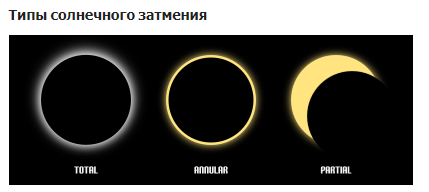

In [ ]:
def solar_set_extract():
    import pandas as pd
    df_final = pd.DataFrame(columns=['Calendar Date',  'Eclipse Type'])
    for i in range(1921,2021,20):
        url = "https://eclipse.gsfc.nasa.gov/SEgoogle/SEgoogle{}.html".format(str(i))
        table = pd.read_html(url)
        df = table[0].copy()
        df.columns = df.columns.droplevel(0).droplevel(1)
        df = df[['Calendar Date', 'Eclipse Type']]
        df_final = df_final.append(df)
    df_final = df_final.reset_index()
    df_final.drop('index',axis=1,inplace=True)
    df_final['Calendar Date'] = df_final['Calendar Date'].str.lower()
    df_final['Calendar Date'] = pd.to_datetime(df_final['Calendar Date'], format='%Y %b %d')
    df_final['Calendar Date'] = df_final['Calendar Date'].dt.date
    df_final['Calendar Date'] = df_final['Calendar Date'].map(lambda x: x.strftime('%Y-%m'))
    df_final.columns = ['date','eclipse_type']
    df_final['eclipse_type'] = df_final['eclipse_type'].str.lower()
    return df_final

solar_eclipse_set = solar_set_extract()
# solar_eclipse_set[''] = 1
#Преобразование набора данных в нужный формат
# pivit_solar_eclipse_set = pd.pivot_table(solar_eclipse_set,index=['date'],values=[''],
#                     columns=['eclipse_type'],aggfunc=np.sum)
# pivit_solar_eclipse_set.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in pivit_solar_eclipse_set.columns]
# pivit_solar_eclipse_set.columns = ['annular_solar_eclipse', 'hybrid_solar_eclipse', 'total_solar_eclipse']
# pivit_solar_eclipse_set[['annular_solar_eclipse', 'hybrid_solar_eclipse', 'total_solar_eclipse']] = pivit_solar_eclipse_set[['annular_solar_eclipse', 'hybrid_solar_eclipse', 'total_solar_eclipse']].fillna(0)
# pivit_solar_eclipse_set[['annular_solar_eclipse', 'hybrid_solar_eclipse', 'total_solar_eclipse']] = pivit_solar_eclipse_set[['annular_solar_eclipse', 'hybrid_solar_eclipse', 'total_solar_eclipse']].astype('int') 
# pivit_solar_eclipse_set
solar_eclipse_set.loc[solar_eclipse_set['eclipse_type']=='annular','eclipse_type'] = 1
solar_eclipse_set.loc[solar_eclipse_set['eclipse_type']=='total','eclipse_type'] = 2
solar_eclipse_set.loc[solar_eclipse_set['eclipse_type']=='hybrid','eclipse_type'] = 3
solar_eclipse_set

,date,eclipse_type
0,1921-04,1
1,1921-10,2
2,1922-03,1
3,1922-09,2
4,1923-03,1
...,...,...
145,2017-08,2
146,2019-07,2
147,2019-12,1
148,2020-06,1


In [ ]:
solar_eclipse_set.to_csv(r'solar_eclipse_set'+str(datetime.datetime.now())+'csv')

## **2. Данные о кризисах/глобальных катастрофах, конфликтах, пандемиях**

[Данные о банковских кризисах](https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx) от Carmen Reinhart & Harvard Business School

<p><b>Банковский кризис</b> - это финансовый кризис, который влияет на банковскую деятельность. Включают массовое изъятие средств из банков. Возникает, когда многие банки в стране одновременно испытывают серьезные проблемы с платежеспособностью или ликвидностью - либо потому, что все они поражены одним и тем же внешним шоком, либо потому, что банкротство одного банка или группы банков распространяется на другие банки в системе.</p>
<p><b>Валютный кризис</b> — обострение противоречий в сфере валютно-кредитных отношений вплоть до критической ситуации, проявляющейся в резких колебаниях курсов валют на валютных рынках, исчерпанием валютных резервов страны, несбалансированности платёжных балансов.</p>
<p><b>Системный кризис</b> - не описываются одним-двумя параметрами (например, спадом производства и ростом безработицы), а охватывают разные сферы социально-экономической жизни (Великой депрессии 1930-х гг. и затяжного кризиса развитых экономик в 1970-е гг)</p>
<p><b>Инфляционный кризис</b> — кризис, вызванный резким взлетом инфляции</p>

In [ ]:
def country_crisis_load(url):
    country_crisis = pd.read_excel(url)
    country_crisis = country_crisis[1:]
    country_crisis = country_crisis[['Country','Year','Banking Crisis ','Systemic Crisis','Independence','Currency Crises','Inflation Crises']]
    country_crisis = country_crisis.loc[country_crisis['Country'].isin(['United States','Spain', 'France', 'Germany'])]
    country_crisis.rename(columns={'Banking Crisis ':'Banking Crisis','Currency Crises':'Currency Crisis','Inflation Crises':'Inflation Crisis'},inplace=True)
    return country_crisis

url2 = 'https://www.hbs.edu/faculty/Documents/ChartData/MapCharts/20160923_global_crisis_data.xlsx'
country_crisis_set = country_crisis_load(url2)
print(country_crisis_set.isnull().sum())
country_crisis_set = country_crisis_set.dropna()
print(country_crisis_set.isnull().sum())
country_crisis_set.head()

Country             0
Year                0
Banking Crisis      8
Systemic Crisis     1
Independence        0
Currency Crisis     0
Inflation Crisis    4
dtype: int64
Country             0
Year                0
Banking Crisis      0
Systemic Crisis     0
Independence        0
Currency Crisis     0
Inflation Crisis    0
dtype: int64


,Country,Year,Banking Crisis,Systemic Crisis,Independence,Currency Crisis,Inflation Crisis
4559,France,1801.0,0,0,1,0,0
4560,France,1802.0,1,1,1,0,0
4561,France,1803.0,0,0,1,0,0
4562,France,1804.0,0,0,1,0,0
4563,France,1805.0,1,1,1,0,0


In [ ]:
country_crisis_set.tail()

,Country,Year,Banking Crisis,Systemic Crisis,Independence,Currency Crisis,Inflation Crisis
14316,United States,2010.0,1,0,1,0,0
14317,United States,2011.0,0,0,1,0,0
14318,United States,2012.0,0,0,1,0,0
14319,United States,2013.0,0,0,1,0,0
14320,United States,2014.0,0,0,1,0,0


In [ ]:
import numpy as np
table = pd.pivot_table(country_crisis_set, values=['Banking Crisis', 'Systemic Crisis', 'Independence','Currency Crisis', 'Inflation Crisis'], 
                       index='Year',columns=['Country'], aggfunc=np.sum)
print(table.shape)

table.isnull().sum()
# Избавимся от всех строк с пропущенными значениями
table = table.dropna()
print(table.shape)
table.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in table.columns]
table = table.astype('int')


(215, 20)
(214, 20)


In [ ]:
import datetime
from dateutil.rrule import rrule, MONTHLY

a = list(table.columns)
b = a.copy()
b.append('date')
m = []
mm = []
dff = pd.DataFrame(columns = a)
dff2 = pd.DataFrame(columns = ['check','date'])

for i in range(table.shape[0]):
    strt_dt = datetime.datetime(int(table.index[i]),1,1)
    end_dt = datetime.datetime(int(table.index[i]),12,31)
    dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
    dates[-1] = end_dt 
    dff = dff.append(pd.DataFrame(table.iloc[i]).T)
    dff2 = dff2.append(pd.DataFrame(data={'check':i,'date':pd.Series(dates).dt.date}))


for i in range(table.shape[0]):
    dff2.loc[dff2['check']==i,a] = list(dff.iloc[i])
dff2.drop(columns='check',inplace=True)
dff2['date'] = dff2['date'].map(lambda x: x.strftime('%Y-%m'))
a = list(dff2.columns)
a.remove('date')
dff2[a] = dff2[a].astype('int') 
print(dff2.isnull().sum())
dff2.columns = dff2.columns.str.lower()
dff2.columns = dff2.columns.str.replace(' ','_')
dff2

date                              0
Banking Crisis|France             0
Banking Crisis|Germany            0
Banking Crisis|Spain              0
Banking Crisis|United States      0
Currency Crisis|France            0
Currency Crisis|Germany           0
Currency Crisis|Spain             0
Currency Crisis|United States     0
Independence|France               0
Independence|Germany              0
Independence|Spain                0
Independence|United States        0
Inflation Crisis|France           0
Inflation Crisis|Germany          0
Inflation Crisis|Spain            0
Inflation Crisis|United States    0
Systemic Crisis|France            0
Systemic Crisis|Germany           0
Systemic Crisis|Spain             0
Systemic Crisis|United States     0
dtype: int64


,date,banking_crisis|france,banking_crisis|germany,banking_crisis|spain,banking_crisis|united_states,currency_crisis|france,currency_crisis|germany,currency_crisis|spain,currency_crisis|united_states,independence|france,independence|germany,independence|spain,independence|united_states,inflation_crisis|france,inflation_crisis|germany,inflation_crisis|spain,inflation_crisis|united_states,systemic_crisis|france,systemic_crisis|germany,systemic_crisis|spain,systemic_crisis|united_states
0,1801-01,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1801-02,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
2,1801-03,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
3,1801-04,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
4,1801-05,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2014-08,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
8,2014-09,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
9,2014-10,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
10,2014-11,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [ ]:
dff2.to_csv(r'crisis'+str(datetime.datetime.now())+'csv')

## **3. Данные о пророчествах**


### [3.1. Предсказания второго пришествия Христа](https://en.wikipedia.org/wiki/Predictions_and_claims_for_the_Second_Coming_of_Christ)

In [ ]:
def etl_second_coming_of_christ():
    """Функция для обработки данных из Википедии о прогнозных датах 2го пришествия Христа"""
    import datetime
    import pandas as pd
    df = pd.read_html('https://en.wikipedia.org/wiki/Predictions_and_claims_for_the_Second_Coming_of_Christ', attrs={"class": "wikitable"})[0]
    df['start_split-'] = df['Predicted date'].str.split('–').str[0]
    df['end_split-'] = df['Predicted date'].str.split('–').str[1]
    df.loc[df['end_split-'].isnull()==False,'date_type'] = 'period'
    df = df.iloc[27:]
    
    l_ser = df.loc[30,['Predicted date', 'Claimant', 'Description', 'start_split-','end_split-']].copy()
    l_ser['Predicted date'] = 1935
    l_ser2 = l_ser.copy()
    l_ser3 = l_ser.copy()
    l_ser4 = l_ser.copy()
    
    
    l_ser2['Predicted date'] = 1943
    l_ser3['Predicted date'] = 1972
    l_ser4['Predicted date'] = 1975
    df.loc[df.shape[0]+1] = l_ser
    df.loc[df.shape[0]+1] = l_ser2
    df.loc[df.shape[0]+1] = l_ser3
    df.loc[df.shape[0]+1] = l_ser4
    df.drop(30, axis='index',inplace=True)
    
    
    ll_ser = df.loc[41,['Predicted date', 'Claimant', 'Description', 'start_split-',
           'end_split-']].copy()
    ll_ser['Predicted date'] = '21 March 2011'
    ll_ser2 = l_ser.copy()
    ll_ser2['Predicted date'] = '21 October 2011'
    df.loc[df.shape[0]+1] = ll_ser
    df.loc[df.shape[0]+1] = ll_ser2
    df.drop(41, axis='index',inplace=True)
    
    
    
    lll_ser = df.loc[42,['Predicted date', 'Claimant', 'Description', 'start_split-',
           'end_split-']].copy()
    lll_ser['Predicted date'] = '29 September 2011'
    ll_ser2 = l_ser.copy()
    ll_ser2['Predicted date'] = '27 May 2012'
    ll_ser3 = l_ser.copy()
    ll_ser3['Predicted date'] = '18 May 2013'
    df.loc[df.shape[0]+1] = ll_ser
    df.loc[df.shape[0]+1] = ll_ser2
    df.drop(42, axis='index',inplace=True)
    df.loc[df['Predicted date'].str.contains('[A-Za-z]', na=False),'date_type'] = 'particular_date'
    df.loc[df['date_type'].isnull()==True,'date_type'] = 'year'
    df.loc[df['date_type']!='period','date'] = pd.to_datetime(df.loc[df['date_type']!='period','Predicted date']).dt.date
    df.reset_index(drop=True,inplace=True)

    df_final = pd.DataFrame(columns = ['сlaimant','date'])
    for i in range(df.shape[0]):
        if df.loc[i,'date_type'] == 'year':
            strt_dt = datetime.date(int(df.loc[i,'Predicted date']),1,1)
            end_dt = datetime.date(int(df.loc[i,'Predicted date']),12,31)
            dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
            df_final = df_final.append(pd.DataFrame(data={'сlaimant':df.loc[i,'Claimant'],
                                          'date':pd.Series(dates).dt.date}))
        if df.loc[i,'date_type'] == 'particular_date':
            strt_dt = df.loc[i,'date']
            end_dt = datetime.date(df.loc[i,'date'].year,12,31)
            dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
            df_final = df_final.append(pd.DataFrame(data={'сlaimant':df.loc[i,'Claimant'],
                                          'date':pd.Series(dates).dt.date}))
        if df.loc[i,'date_type'] == 'period':
            strt_dt = datetime.date(int(df.loc[i,'start_split-']),1,1)
            end_dt = datetime.date(int(df.loc[i,'end_split-']),12,31)
            dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
            df_final = df_final.append(pd.DataFrame(data={'сlaimant':df.loc[i,'Claimant'],
                                          'date':pd.Series(dates).dt.date}))
    df_final['сlaimant'] = 1
    df_final.rename(columns={'сlaimant':'second_coming_of_christ'},inplace=True)
    return df_final
second_coming_of_christ_set = etl_second_coming_of_christ()
second_coming_of_christ_set


,second_coming_of_christ,date
0,1,1915-01-01
1,1,1915-02-01
2,1,1915-03-01
3,1,1915-04-01
4,1,1915-05-01
...,...,...
6,1,2012-11-27
7,1,2012-12-27
0,1,2011-10-21
1,1,2011-11-21


In [ ]:
second_coming_of_christ_set.to_csv(r'second_coming_of_christ_set'+str(datetime.datetime.now())+'csv')

### 3.2.**Предсказания** Ванги до 2262г по месяцам [1](http://www.vizagchemical.com/blog/list-baba-vanga-predictions-info-chemical-man)

In [ ]:
#ПРЕДСКАЗАНИЯ ВАНГИ ДО 2262г ПО МЕСЯЦАМ
def months_in_range(start_date, end_date):
    """Функция для генерации списка дат"""
    return pd.date_range(start_date, end_date, freq='M').strftime('%Y-%m')

def etl_vanga_predictions():
    """Функция для обработки данных о предсказаниях Ванги"""
    from bs4 import BeautifulSoup
    from datetime import datetime
    import pandas as pd
    import requests
    import re
    
    resp = requests.get('http://www.vizagchemical.com/blog/list-baba-vanga-predictions-info-chemical-man')
    soup = BeautifulSoup(resp.text, 'lxml')
    tags = soup.find_all('strong')
    
    items_predictions = {}
    
    for el in tags:
        if re.match(r"^\d\d\d\d", el.text):
            substr = el.text.split(' ')
            year = int(substr[0])
            if year >= 2262:
                break
            for date in months_in_range(datetime(year, 1, 1), datetime(year+1, 1, 1)):
                items_predictions[date] = el.text
    
    vanga_pred = pd.DataFrame(items_predictions.items(), columns=['Date', 'VangaDescriptions'])
    vanga_pred['VangaDescriptions'] = vanga_pred['VangaDescriptions'].str.replace('\d+', '').str.replace('– ', '')
    return vanga_pred

vanga_predictions = etl_vanga_predictions()
vanga_predictions

,Date,VangaDescriptions
0,2010-01,World War III. War will begin in November an...
1,2010-02,World War III. War will begin in November an...
2,2010-03,World War III. War will begin in November an...
3,2010-04,World War III. War will begin in November an...
4,2010-05,World War III. War will begin in November an...
...,...,...
367,2256-08,Spacecraft forgotten to Earth terrible new di...
368,2256-09,Spacecraft forgotten to Earth terrible new di...
369,2256-10,Spacecraft forgotten to Earth terrible new di...
370,2256-11,Spacecraft forgotten to Earth terrible new di...


In [ ]:
#Для загрузки файла с ключами к Google Cloud Natural Language API
from google.colab import files
uploaded = files.upload()

Saving genuine-ember-293313-a5b5ed9b1ebb.json to genuine-ember-293313-a5b5ed9b1ebb.json


In [ ]:
# !pip install google.cloud
# Google Cloud Natural Language API for sentiment analysis 
#Данные для обработки Google Cloud Natural Language API
dataset = list(vanga_predictions['VangaDescriptions'].str.replace('\d+', '').str.replace('– ', '').unique())
from google.cloud.language_v1 import enums


def gc_sentiment(text):  
    from google.cloud import language
    
    path = '***.json' #FULL path to your service account key
    client = language.LanguageServiceClient.from_service_account_json(path)
    document = language.types.Document(
            content=text,
            type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude
    return score, magnitude


from tqdm import tqdm 
import pandas as pd
gc_results = [gc_sentiment(row) for row in tqdm(dataset, ncols = 100)]
gc_score, gc_magnitude = zip(*gc_results)
gc = list(zip(dataset, gc_score, gc_magnitude))
columns = ['text', 'score_google', 'magnitude_google']
gc_df = pd.DataFrame(gc, columns = columns)
gc_df

100%|███████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  4.81it/s]


,text,score_google,magnitude_google
0,World War III. War will begin in November an...,0.1,0.3
1,As a result of the fallout of nuclear fallout...,-0.4,0.8
2,Most people will suffer skin cancer and other...,-0.5,0.5
3,Europe almost lonely (empty).,-0.6,0.6
4,New China becomes a world power. Developing c...,0.3,0.8
5,A little bit of change in the Earth’s orbit.,0.0,0.0
6,Europe still little settled.,-0.2,0.2
7,Creating a new energy source (probably a cont...,0.0,0.1
8,The polar ice are melting. Greater levels of ...,0.1,0.2
9,"The world economy is thriving. In Europe, Mus...",0.3,0.6


In [ ]:
#Метод к API AMAZON для определения позитивного, негативного, нейтрального тона в тексте. Нужен будет для составления весов по пророчествам
# !pip install boto3
import boto3
import json

text = "It is raining today in Seattle"

def get_sentiment_aws(row, lang):
    try:
      comprehend = boto3.client(service_name='***', 
                                region_name='us-east-1', 
                                aws_access_key_id='***', 
                                aws_secret_access_key='***')
      payload = comprehend.detect_sentiment(Text=row, LanguageCode=lang)  
      sentiment = payload #['Sentiment']
    except Exception:
      print("Size exceeded:  Fail")
      return None
    return sentiment['Sentiment'],sentiment['SentimentScore']['Mixed']

get_sentiment_aws(text, 'en')

dataset = list(vanga_predictions['VangaDescriptions'].str.replace('\d+', '').str.replace('– ', '').unique())


from tqdm import tqdm # This is an awesome package for tracking for loops
import pandas as pd
gc_results = [get_sentiment_aws(row, 'en') for row in tqdm(dataset, ncols = 100)]
gc_name_score, gc_value_score = zip(*gc_results) # Unpacking the result into 2 lists
gc = list(zip(dataset, gc_name_score, gc_value_score))
columns = ['text', 'sentiment_aws', 'mixed_aws']
gc_df_aws = pd.DataFrame(gc, columns = columns)
gc_df_aws

100%|███████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  7.16it/s]


,text,sentiment_aws,mixed_aws
0,World War III. War will begin in November an...,NEUTRAL,0.000727
1,As a result of the fallout of nuclear fallout...,NEUTRAL,0.000048
2,Most people will suffer skin cancer and other...,NEUTRAL,0.000026
3,Europe almost lonely (empty).,NEGATIVE,0.000205
4,New China becomes a world power. Developing c...,NEUTRAL,0.033507
5,A little bit of change in the Earth’s orbit.,NEUTRAL,0.000044
6,Europe still little settled.,NEUTRAL,0.000154
7,Creating a new energy source (probably a cont...,NEUTRAL,0.000130
8,The polar ice are melting. Greater levels of ...,NEUTRAL,0.000008
9,"The world economy is thriving. In Europe, Mus...",NEUTRAL,0.000069


In [ ]:
vanga_predictions_set = vanga_predictions.merge(gc_df_aws,how='left',left_on='VangaDescriptions',right_on='text').merge(gc_df,how='left',on='text')
vanga_predictions_set = vanga_predictions_set[['Date','VangaDescriptions','sentiment_aws',	'mixed_aws',	'score_google',	'magnitude_google']]
vanga_predictions_set.rename(columns={'Date':'date','VangaDescriptions':'vanga_descriptions'},inplace=True)
vanga_predictions_set['vanga_binary'] = 1
vanga_predictions_set = vanga_predictions_set[['date','vanga_descriptions','sentiment_aws', 'score_google', 'magnitude_google','vanga_binary']]
vanga_predictions_set

,date,vanga_descriptions,sentiment_aws,score_google,magnitude_google,vanga_binary
0,2010-01,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
1,2010-02,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
2,2010-03,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
3,2010-04,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
4,2010-05,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
...,...,...,...,...,...,...
367,2256-08,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1
368,2256-09,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1
369,2256-10,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1
370,2256-11,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1


In [ ]:
vanga_predictions_set.to_csv(r'vanga_predictions_set'+str(datetime.datetime.now())+'csv')

## **4. Данные о цене золота**

[Источник данных](https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart)

**Парсинг данных**

Данные были скачены через браузер в консоли разработчика на странице динамического графика, скриптом javascript, который получает объект originalData, затем преобразует в JSON и сохраняет в файл data.json 
```javascript
function download(content, fileName, contentType) {
    let a = document.createElement("a");
    let file = new Blob([content], {type: contentType});
    a.href = URL.createObjectURL(file);
    a.download = fileName;
    a.click();
}
download(JSON.stringify(originalData), 'data.json', 'text/plain');
```

In [ ]:
def load_gold_price_git():
    """Функция для обработки json с данными о золоте"""
    df =  pd.read_json (r'https://raw.githubusercontent.com/NeznaikanaLune/misis_dataton2020/main/data_storage/sub_data/data.json')
    df = df[['date','close']]
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df['date'] = df['date'].dt.date
    df.rename(columns={"close": "gold_price"},inplace=True)
    df['date2']=df['date'].map(lambda x: x.strftime('%Y-%m'))
    return df

gold_prices_dataset = load_gold_price_git()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


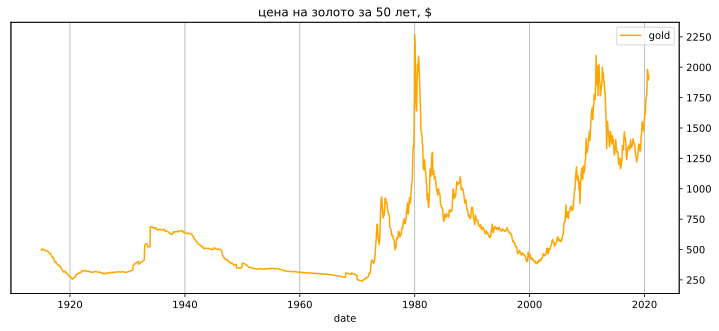

In [ ]:
#График цены на золото
import pandas_datareader.data as web

# для анализа
import numpy as np
import pandas as pd
import statsmodels.api as sm
from datetime import datetime, timedelta

# для визуализации
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10, 6)
gold_prices_dataset_for_plotting = gold_prices_dataset[['date','gold_price']].copy()
gold_prices_dataset_for_plotting = gold_prices_dataset_for_plotting.set_index('date')

# период анализа
# end = datetime.now()
# start = end - timedelta(days=18000)


# gold = web.DataReader('GOLDAMGBD228NLBM,', 'fred', start=start, end=end)
# gold.index.rename("date", inplace=True);
# gold = gold.iloc[:,0].rename("gold_price");
# df = pd.DataFrame([gold]).T

plt.figure(figsize=(12,5))
plt.title('цена на золото за 50 лет, $')


ax = gold_prices_dataset_for_plotting.gold_price.plot(color='orange', grid=True, secondary_y=True, label='gold')

h, l = ax.get_legend_handles_labels()

plt.legend(h, l, loc=1)
plt.show()


In [ ]:
gold_prices_dataset = gold_prices_dataset.drop('date',axis=1)
gold_prices_dataset.rename(columns={"date2": "date"},inplace=True)
gold_prices_dataset

,gold_price,date
0,496.07,1915-01
1,501.04,1915-02
2,506.10,1915-03
3,501.04,1915-04
4,496.07,1915-05
...,...,...
1265,1788.41,2020-06
1266,1981.54,2020-07
1267,1972.47,2020-08
1268,1893.90,2020-09


In [ ]:
#Данные о цене золота по месяцам с 1950 года
# def extract_csv_by_url (url):
#     """Cчитывает csv файл по url адресу в датафрейм"""
#     import pandas as pd
#     df = pd.read_csv(url)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df['Date'] = df['Date'].dt.date
#     return df

# url_datahub = 'https://datahub.io/core/gold-prices/r/monthly.csv'
# gold_prices_dataset = extract_csv_by_url(url_datahub)
# print(gold_prices_dataset.shape)
# gold_prices_dataset.head()
# gold_prices_dataset.rename(columns={"Date": "date", "Price": "gold_price"},inplace=True)
# gold_prices_dataset['date']=gold_prices_dataset['date'].map(lambda x: x.strftime('%Y-%m'))


## **5. Данные о ВВП**
БЕЗ КИТАЯ, тк отсутствуют по нему данные с 1915 до 1949

cgdppc - ВВП на душу населения. Выражается в долларах США 2011 года с поправкой на инфляцию в Соединенных Штатах

cgdppc - реальный ВВП на душу населения. Особенностью является то, что он отслеживает темпы роста ВВП на душу населения, приведенные в национальных счетах стран (или их исторических
реконструкциях). Полезен для сравнения темпов роста ВВП на душу населения в течение времени. 

In [ ]:
def etl_gdp_data():
    """Функция для импорта и обработки данных о ВВП"""
    import pandas as pd
    import numpy as np
    import datetime
    from dateutil.rrule import rrule, MONTHLY

    gdp_set = pd.read_excel(r'https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.xlsx',sheet_name='Full data')
    gdp_set = gdp_set.loc[gdp_set['country'].isin(['United States','Spain', 'France', 'Germany'])]
    gdp_set = gdp_set[['country','year','cgdppc','rgdpnapc']]
    gdp_set = gdp_set[gdp_set['year']>=1915]
    print(gdp_set.isnull().sum())
    #Обработка дат
    gdp_set['start_date'] = pd.to_datetime(gdp_set['year'].apply(str))
    gdp_set['start_date'] = gdp_set['start_date'].dt.date
    gdp_set = gdp_set.reset_index(drop=True)
    #Фомируем набор данных с детализацией до месяца
    df = pd.DataFrame()

    for i in range(gdp_set.shape[0]):
        strt_dt = datetime.date(gdp_set.loc[i,'year'],1,1)
        end_dt = datetime.date(gdp_set.loc[i,'year'],12,31)
        dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
        df = df.append(pd.DataFrame(data={'country':gdp_set.loc[i,'country'],
                                          'cgdppc':gdp_set.loc[i,'cgdppc'],
                                          'rgdpnapc':gdp_set.loc[i,'rgdpnapc'],
                                          'date':pd.Series(dates).dt.date}))
    df['date'] = df['date'].map(lambda x: x.strftime('%Y-%m'))
    df['cgdppc'] = df['cgdppc'].astype('int')
    df['rgdpnapc'] = df['rgdpnapc'].astype('int')


    gdp_table = pd.pivot_table(df, values=['cgdppc','rgdpnapc'], 
                       index='date',columns=['country'], aggfunc=np.sum)
    # print(gdp_table.shape)

    print(gdp_table.isnull().sum())
    # # Избавимся от всех строк с пропущенными значениями
    # gdp_table = gdp_table.dropna()
    # print(gdp_table.shape)
    gdp_table.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in gdp_table.columns]
    gdp_table.reset_index(inplace=True)
    gdp_table.columns = gdp_table.columns.str.lower()
    return gdp_table

gdp_dataset = etl_gdp_data()

gdp_dataset

country     0
year        0
cgdppc      0
rgdpnapc    0
dtype: int64
          country      
cgdppc    France           0
          Germany          0
          Spain            0
          United States    0
rgdpnapc  France           0
          Germany          0
          Spain            0
          United States    0
dtype: int64


,date,cgdppc|france,cgdppc|germany,cgdppc|spain,cgdppc|united states,rgdpnapc|france,rgdpnapc|germany,rgdpnapc|spain,rgdpnapc|united states
0,1915-01,4707,4290,4280,7434,5343,5856,3517,7434
1,1915-02,4707,4290,4280,7434,5343,5856,3517,7434
2,1915-03,4707,4290,4280,7434,5343,5856,3517,7434
3,1915-04,4707,4290,4280,7434,5343,5856,3517,7434
4,1915-05,4707,4290,4280,7434,5343,5856,3517,7434
...,...,...,...,...,...,...,...,...,...
1219,2016-08,38758,46841,31556,53015,37124,44689,30110,53015
1220,2016-09,38758,46841,31556,53015,37124,44689,30110,53015
1221,2016-10,38758,46841,31556,53015,37124,44689,30110,53015
1222,2016-11,38758,46841,31556,53015,37124,44689,30110,53015


In [ ]:
gdp_dataset.to_csv(r'gdp_dataset'+str(datetime.datetime.now())+'csv')

## [**6.Убийства**](http://www.cgeh.nl)

Уровень убийств в стране(homicide_rate) - преднамеренные убийства, умышленно причиненная одному человеку другим человеком – измеряется в количестве смертей на 100 000 жителей

In [ ]:
def etl_homicide():
    """Функция для импорта и обработки дынных о паказателе убийств в разных странах"""
    import pandas as pd
    import datetime
    from dateutil.rrule import rrule, MONTHLY


    homicide = pd.read_excel('http://www.cgeh.nl/sites/default/files/homicide.xlsx',skiprows=2)
    homicide = homicide[homicide['Continent, Region, Country'].isin(['France','Germany','Spain','United States of America'])]
    homicide = homicide.iloc[:,1:]
    
    selected_column_list = [homicide.columns[0]]+[homicide.columns[i] for i in range(416,510)]
    homicide = homicide[selected_column_list]
    homicide_unpivoted = homicide.melt(id_vars=['Continent, Region, Country'], var_name='date', value_name='homiside_rate')
    df = pd.DataFrame()

    for i in range(homicide_unpivoted.shape[0]):
        strt_dt = datetime.date(homicide_unpivoted.loc[i,'date'],1,1)
        end_dt = datetime.date(homicide_unpivoted.loc[i,'date'],12,31)
        dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]
        df = df.append(pd.DataFrame(data={'country':homicide_unpivoted.loc[i,'Continent, Region, Country'],
                                          'homicide_rate':homicide_unpivoted.loc[i,'homiside_rate'],
                                          'date':pd.Series(dates).dt.date}))
        df.loc[df['country'] == 'United States of America','country'] = 'United States'
    return df
homicide_dataset = etl_homicide()
homicide_dataset['date'] = homicide_dataset['date'].map(lambda x: x.strftime('%Y-%m'))
homicide_dataset.rename({'homicide_dataset':'country'},inplace=True)
homicide_dataset

,country,homicide_rate,date
0,France,1.5,1915-01
1,France,1.5,1915-02
2,France,1.5,1915-03
3,France,1.5,1915-04
4,France,1.5,1915-05
...,...,...,...
7,United States,5.9,2008-08
8,United States,5.9,2008-09
9,United States,5.9,2008-10
10,United States,5.9,2008-11


In [ ]:
import numpy as np
homicide_table = pd.pivot_table(homicide_dataset, values=['homicide_rate'], 
                       index='date',columns=['country'], aggfunc=np.sum)
# print(homicide_table.shape)

print(homicide_table.isnull().sum())
# # Избавимся от всех строк с пропущенными значениями
# homicide_table = homicide_table.dropna()
# print(homicide_table.shape)
homicide_table.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in homicide_table.columns]
homicide_table.reset_index(inplace=True)
homicide_table.columns = homicide_table.columns.str.lower()
homicide_table

               country      
homicide_rate  France           0
               Germany          0
               Spain            0
               United States    0
dtype: int64


,date,homicide_rate|france,homicide_rate|germany,homicide_rate|spain,homicide_rate|united states
0,1915-01,1.50,2.10,4.50,5.9
1,1915-02,1.50,2.10,4.50,5.9
2,1915-03,1.50,2.10,4.50,5.9
3,1915-04,1.50,2.10,4.50,5.9
4,1915-05,1.50,2.10,4.50,5.9
...,...,...,...,...,...
1123,2008-08,0.71,0.54,0.82,5.9
1124,2008-09,0.71,0.54,0.82,5.9
1125,2008-10,0.71,0.54,0.82,5.9
1126,2008-11,0.71,0.54,0.82,5.9


In [ ]:
homicide_table.to_csv(r'homicide_table'+str(datetime.datetime.now())+'csv')

## 7.Объединение данных



In [ ]:
#Создаем временную ось
import pandas as pd
testtest = pd.DataFrame(data={'date':pd.date_range(start=str(startime.date()),end=str(endtime.date()))})
testtest['date'] = testtest['date'].map(lambda x: x.strftime('%Y-%m'))
testtest = pd.DataFrame(testtest['date'].drop_duplicates())
testtest['date_dt'] = pd.to_datetime(testtest['date']).dt.date

In [ ]:
#Объединяем астрономические данные
finish_set = testtest.merge(sun_activity_set,how='left',on='date').merge(solar_eclipse_set,how='left',on='date').merge(moon_eclipse_set,how='left',on='date').merge(full_new_moons_set,how='left',on='date')
finish_set['solar_cycle'] = finish_set['solar_cycle'].str.replace('Solar cycle ','')
finish_set = finish_set.fillna(0)
finish_set['full_moon_eclipse'] = finish_set['full_moon_eclipse'].astype('int')
print(finish_set.isnull().sum()[finish_set.isnull().sum()>0])
finish_set

Series([], dtype: int64)


,date,date_dt,solar_cycle,eclipse_type,full_moon_eclipse,full_moon,new_moon
0,1915-01,1915-01-01,15,0,0,5,5
1,1915-02,1915-02-01,15,0,0,1,1
2,1915-03,1915-03-01,15,0,0,3,3
3,1915-04,1915-04-01,15,0,0,2,2
4,1915-05,1915-05-01,15,0,0,2,2
...,...,...,...,...,...,...,...
1265,2020-06,2020-06-01,0,1,0,2,2
1266,2020-07,2020-07-01,0,0,0,2,2
1267,2020-08,2020-08-01,0,0,0,2,2
1268,2020-09,2020-09-01,0,0,0,2,2


In [ ]:
# Добавляем данные о цене золота
finish_set2 = finish_set.merge(gold_prices_dataset,how='left',on='date')
# finish_set2.fillna(0)
print(finish_set2.isnull().sum()[finish_set2.isnull().sum()>0])


Series([], dtype: int64)


In [ ]:
vanga_predictions_set

,date,vanga_descriptions,sentiment_aws,score_google,magnitude_google,vanga_binary
0,2010-01,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
1,2010-02,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
2,2010-03,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
3,2010-04,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
4,2010-05,World War III. War will begin in November an...,NEUTRAL,0.1,0.3,1
...,...,...,...,...,...,...
367,2256-08,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1
368,2256-09,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1
369,2256-10,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1
370,2256-11,Spacecraft forgotten to Earth terrible new di...,NEGATIVE,-0.6,0.6,1


In [ ]:
# Добавляем данные о пророчествах Ванги
finish_set3 = finish_set2.merge(vanga_predictions_set,how='left',left_on='date',right_on='date')
finish_set3.loc[finish_set3['vanga_descriptions'].isnull()==True,'vanga_descriptions'] = 'do not know'
finish_set3 = finish_set3.fillna(0)
print(finish_set2.isnull().sum()[finish_set2.isnull().sum()>0])
finish_set3

Series([], dtype: int64)


,date,date_dt,solar_cycle,eclipse_type,full_moon_eclipse,full_moon,new_moon,gold_price,vanga_descriptions,sentiment_aws,score_google,magnitude_google,vanga_binary
0,1915-01,1915-01-01,15,0,0,5,5,496.07,do not know,0,0.0,0.0,0.0
1,1915-02,1915-02-01,15,0,0,1,1,501.04,do not know,0,0.0,0.0,0.0
2,1915-03,1915-03-01,15,0,0,3,3,506.10,do not know,0,0.0,0.0,0.0
3,1915-04,1915-04-01,15,0,0,2,2,501.04,do not know,0,0.0,0.0,0.0
4,1915-05,1915-05-01,15,0,0,2,2,496.07,do not know,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,2020-06,2020-06-01,0,1,0,2,2,1788.41,do not know,0,0.0,0.0,0.0
1266,2020-07,2020-07-01,0,0,0,2,2,1981.54,do not know,0,0.0,0.0,0.0
1267,2020-08,2020-08-01,0,0,0,2,2,1972.47,do not know,0,0.0,0.0,0.0
1268,2020-09,2020-09-01,0,0,0,2,2,1893.90,do not know,0,0.0,0.0,0.0


In [ ]:
# Добавляем набор данных с прогнозом 2го пришествия Христа
finish_set4 = finish_set3.merge(second_coming_of_christ_set,how='left',left_on='date',right_on='date')
finish_set4.loc[finish_set4['second_coming_of_christ'].isnull()==True,'vanga_descriptions'] = 'do not know'
finish_set4['second_coming_of_christ'].fillna(0,inplace=True)
print(finish_set2.isnull().sum()[finish_set2.isnull().sum()>0])

Series([], dtype: int64)


In [ ]:
finish_set44 = finish_set4.merge(retro_planets_set,how='left',on='date')

In [ ]:
#Обогащаем данными о кризисах
finish_set5 = finish_set44.merge(dff2,how='left',on='date')
# Обрабатываем недостающие данные с 2014 года
finish_set5 = finish_set5.fillna(method='ffill',axis=1)
print(finish_set5.isnull().sum())
finish_set5

date                              0
date_dt                           0
solar_cycle                       0
eclipse_type                      0
full_moon_eclipse                 0
full_moon                         0
new_moon                          0
gold_price                        0
vanga_descriptions                0
sentiment_aws                     0
score_google                      0
magnitude_google                  0
vanga_binary                      0
second_coming_of_christ           0
mercury_retro                     0
venus_retro                       0
mars_retro                        0
jupiter_retro                     0
saturn_retro                      0
uranium_retro                     0
neptune_retro                     0
pluto_retro                       0
banking_crisis|france             0
banking_crisis|germany            0
banking_crisis|spain              0
banking_crisis|united_states      0
currency_crisis|france            0
currency_crisis|germany     

,date,date_dt,solar_cycle,eclipse_type,full_moon_eclipse,full_moon,new_moon,gold_price,vanga_descriptions,sentiment_aws,score_google,magnitude_google,vanga_binary,second_coming_of_christ,mercury_retro,venus_retro,mars_retro,jupiter_retro,saturn_retro,uranium_retro,neptune_retro,pluto_retro,banking_crisis|france,banking_crisis|germany,banking_crisis|spain,banking_crisis|united_states,currency_crisis|france,currency_crisis|germany,currency_crisis|spain,currency_crisis|united_states,independence|france,independence|germany,independence|spain,independence|united_states,inflation_crisis|france,inflation_crisis|germany,inflation_crisis|spain,inflation_crisis|united_states,systemic_crisis|france,systemic_crisis|germany,systemic_crisis|spain,systemic_crisis|united_states
0,1915-01,1915-01-01,15,0,0,5,5,496.07,do not know,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0
1,1915-02,1915-02-01,15,0,0,1,1,501.04,do not know,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0
2,1915-03,1915-03-01,15,0,0,3,3,506.1,do not know,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0
3,1915-04,1915-04-01,15,0,0,2,2,501.04,do not know,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0
4,1915-05,1915-05-01,15,0,0,2,2,496.07,do not know,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,2020-06,2020-06-01,0,1,0,2,2,1788.41,do not know,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1266,2020-07,2020-07-01,0,0,0,2,2,1981.54,do not know,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1267,2020-08,2020-08-01,0,0,0,2,2,1972.47,do not know,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1268,2020-09,2020-09-01,0,0,0,2,2,1893.9,do not know,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Добавляем данные о ВВП
finish_set6 = finish_set5.merge(gdp_dataset,how='left',on='date')
print(finish_set6.isnull().sum())
#Обработка недостающих данных с 2016г
finish_set6 = finish_set6.interpolate()
print(finish_set6.isnull().sum()[finish_set6.isnull().sum()>0])

date                               0
date_dt                            0
solar_cycle                        0
eclipse_type                       0
full_moon_eclipse                  0
full_moon                          0
new_moon                           0
gold_price                         0
vanga_descriptions                 0
sentiment_aws                      0
score_google                       0
magnitude_google                   0
vanga_binary                       0
second_coming_of_christ            0
mercury_retro                      0
venus_retro                        0
mars_retro                         0
jupiter_retro                      0
saturn_retro                       0
uranium_retro                      0
neptune_retro                      0
pluto_retro                        0
banking_crisis|france              0
banking_crisis|germany             0
banking_crisis|spain               0
banking_crisis|united_states       0
currency_crisis|france             0
c

In [ ]:
#Добавляем данные об убийствах
finish_set7 = finish_set6.merge(homicide_table,how='left',on='date')
#Обработка недостающих данных с 2008г
finish_set7 = finish_set7.interpolate()
print(finish_set7.isnull().sum())
finish_set7

date                              0
date_dt                           0
solar_cycle                       0
eclipse_type                      0
full_moon_eclipse                 0
full_moon                         0
new_moon                          0
gold_price                        0
vanga_descriptions                0
sentiment_aws                     0
score_google                      0
magnitude_google                  0
vanga_binary                      0
second_coming_of_christ           0
mercury_retro                     0
venus_retro                       0
mars_retro                        0
jupiter_retro                     0
saturn_retro                      0
uranium_retro                     0
neptune_retro                     0
pluto_retro                       0
banking_crisis|france             0
banking_crisis|germany            0
banking_crisis|spain              0
banking_crisis|united_states      0
currency_crisis|france            0
currency_crisis|germany     

,date,date_dt,solar_cycle,eclipse_type,full_moon_eclipse,full_moon,new_moon,gold_price,vanga_descriptions,sentiment_aws,score_google,magnitude_google,vanga_binary,second_coming_of_christ,mercury_retro,venus_retro,mars_retro,jupiter_retro,saturn_retro,uranium_retro,neptune_retro,pluto_retro,banking_crisis|france,banking_crisis|germany,banking_crisis|spain,banking_crisis|united_states,currency_crisis|france,currency_crisis|germany,currency_crisis|spain,currency_crisis|united_states,independence|france,independence|germany,independence|spain,independence|united_states,inflation_crisis|france,inflation_crisis|germany,inflation_crisis|spain,inflation_crisis|united_states,systemic_crisis|france,systemic_crisis|germany,systemic_crisis|spain,systemic_crisis|united_states,cgdppc|france,cgdppc|germany,cgdppc|spain,cgdppc|united states,rgdpnapc|france,rgdpnapc|germany,rgdpnapc|spain,rgdpnapc|united states,homicide_rate|france,homicide_rate|germany,homicide_rate|spain,homicide_rate|united states
0,1915-01,1915-01-01,15,0,0,5,5,496.07,do not know,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,4707.0,4290.0,4280.0,7434.0,5343.0,5856.0,3517.0,7434.0,1.50,2.10,4.50,5.9
1,1915-02,1915-02-01,15,0,0,1,1,501.04,do not know,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,4707.0,4290.0,4280.0,7434.0,5343.0,5856.0,3517.0,7434.0,1.50,2.10,4.50,5.9
2,1915-03,1915-03-01,15,0,0,3,3,506.1,do not know,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,4707.0,4290.0,4280.0,7434.0,5343.0,5856.0,3517.0,7434.0,1.50,2.10,4.50,5.9
3,1915-04,1915-04-01,15,0,0,2,2,501.04,do not know,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,4707.0,4290.0,4280.0,7434.0,5343.0,5856.0,3517.0,7434.0,1.50,2.10,4.50,5.9
4,1915-05,1915-05-01,15,0,0,2,2,496.07,do not know,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,4707.0,4290.0,4280.0,7434.0,5343.0,5856.0,3517.0,7434.0,1.50,2.10,4.50,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,2020-06,2020-06-01,0,1,0,2,2,1788.41,do not know,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38758.0,46841.0,31556.0,53015.0,37124.0,44689.0,30110.0,53015.0,0.71,0.54,0.82,5.9
1266,2020-07,2020-07-01,0,0,0,2,2,1981.54,do not know,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38758.0,46841.0,31556.0,53015.0,37124.0,44689.0,30110.0,53015.0,0.71,0.54,0.82,5.9
1267,2020-08,2020-08-01,0,0,0,2,2,1972.47,do not know,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38758.0,46841.0,31556.0,53015.0,37124.0,44689.0,30110.0,53015.0,0.71,0.54,0.82,5.9
1268,2020-09,2020-09-01,0,0,0,2,2,1893.9,do not know,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38758.0,46841.0,31556.0,53015.0,37124.0,44689.0,30110.0,53015.0,0.71,0.54,0.82,5.9


In [ ]:
finish_set7.isnull().sum()[finish_set7.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
import datetime
finish_set7[['solar_cycle', 'eclipse_type', 'full_moon_eclipse',
       'full_moon', 'new_moon','vanga_binary', 'mercury_retro', 'venus_retro', 'mars_retro',
       'jupiter_retro', 'saturn_retro', 'uranium_retro', 'neptune_retro',
       'pluto_retro',
       'second_coming_of_christ',
       'banking_crisis|france', 'banking_crisis|germany',
       'banking_crisis|spain', 'banking_crisis|united_states',
       'currency_crisis|france', 'currency_crisis|germany',
       'currency_crisis|spain', 'currency_crisis|united_states',
       'independence|france', 'independence|germany', 'independence|spain',
       'independence|united_states', 'inflation_crisis|france',
       'inflation_crisis|germany', 'inflation_crisis|spain',
       'inflation_crisis|united_states', 'systemic_crisis|france',
       'systemic_crisis|germany', 'systemic_crisis|spain',
       'systemic_crisis|united_states','cgdppc|france', 'cgdppc|germany',
       'cgdppc|spain', 'cgdppc|united states', 'rgdpnapc|france',
       'rgdpnapc|germany', 'rgdpnapc|spain', 'rgdpnapc|united states']] = finish_set7[['solar_cycle', 'eclipse_type', 'full_moon_eclipse',
       'full_moon', 'new_moon','vanga_binary', 'mercury_retro', 'venus_retro', 'mars_retro',
       'jupiter_retro', 'saturn_retro', 'uranium_retro', 'neptune_retro',
       'pluto_retro',
       'second_coming_of_christ',
       'banking_crisis|france', 'banking_crisis|germany',
       'banking_crisis|spain', 'banking_crisis|united_states',
       'currency_crisis|france', 'currency_crisis|germany',
       'currency_crisis|spain', 'currency_crisis|united_states',
       'independence|france', 'independence|germany', 'independence|spain',
       'independence|united_states', 'inflation_crisis|france',
       'inflation_crisis|germany', 'inflation_crisis|spain',
       'inflation_crisis|united_states', 'systemic_crisis|france',
       'systemic_crisis|germany', 'systemic_crisis|spain',
       'systemic_crisis|united_states', 'cgdppc|france', 'cgdppc|germany',
       'cgdppc|spain', 'cgdppc|united states', 'rgdpnapc|france',
       'rgdpnapc|germany', 'rgdpnapc|spain', 'rgdpnapc|united states']].astype('int')
finish_set7[['gold_price','score_google', 'magnitude_google']] = finish_set7[['gold_price','score_google', 'magnitude_google']].astype('float')
finish_set7[['vanga_descriptions','sentiment_aws']] = finish_set7[['vanga_descriptions','sentiment_aws']].astype('str')
finish_set7['date'] = finish_set7['date'].astype('str')
finish_set7['date_dt'] = finish_set7['date_dt'].astype('datetime64[ns]')
finish_set7.rename(columns={'eclipse_type':'solar_eclipse'},inplace=True)
finish_set7.to_csv(r'astro_crisis_predictions_set'+str(datetime.datetime.now())+'csv')

In [ ]:
finish_set7.to_csv(r'astro_crisis_predictions_set'+str(datetime.datetime.now())+'csv')

In [ ]:
finish_set7.shape

(1270, 54)

In [ ]:
# import datetime
# finish_set8 = finish_set7[finish_set7['date_dt']<=datetime.date(2008,12,31)].copy()
# finish_set8.isnull().sum()[finish_set8.isnull().sum()>0]
# corr = finish_set8.corr()
# corr.style.background_gradient(cmap='coolwarm')